# Exercise 2

## 2.5

Implement Hermite interpolation using divided differences:  find
$ p ∈ P^{2n+1}$ such that $p(x_i) =f(x_i)$ and $p′(x_i) =f′(x_i)$ for $i= 0...n$. Test your implementation for $f(x) = sin(x)$, and $x_0= 0,x_1=\pi/2,x_2=\pi$. You can start from the notebook NewtonInterpolation.ipynb provided in the lecture.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['lines.linewidth'] = 2.0
mpl.rcParams['grid.linewidth'] = 1.0

def NewtonInterpol (pts, vals, derivatives=None):
    """
    Calculate coefficients of Newton interpol by 
    divided differences.
    
    input: 
       pts ... list of points
       val ... list of values
       
    output: 
       divided differences
    """
    
    if derivatives is not None:
        pts = [val for val in pts for _ in (0, 1)]
        vals = [val for val in vals for _ in (0, 1)]
    
    n = len(pts)-1
    dd = np.asarray(vals)
    for i in range(n):
        for j in range(n, i, -1):
            # print ("i =",i, ", j =",j)
            if pts[j] == pts[j-i-1]:
                dd[j] = derivatives[int(j/2)]
            else:
                dd[j] = (dd[j]-dd[j-1]) / (pts[j]-pts[j-i-1])
    return dd


def Horner (pts, dd, x):
    """
    Horner scheme for polynomial evaluation in Newton basis
    """
    
    if len(dd) == 2*len(pts):
        pts = [val for val in pts for _ in (0, 1)]
    
    n = len(pts)-1
    sum = dd[n]
    for i in range(n-1, -1, -1):
        sum = sum * (x-pts[i]) + dd[i]
    return sum


6


Text(0.5, 1.0, 'Interpolation Error')

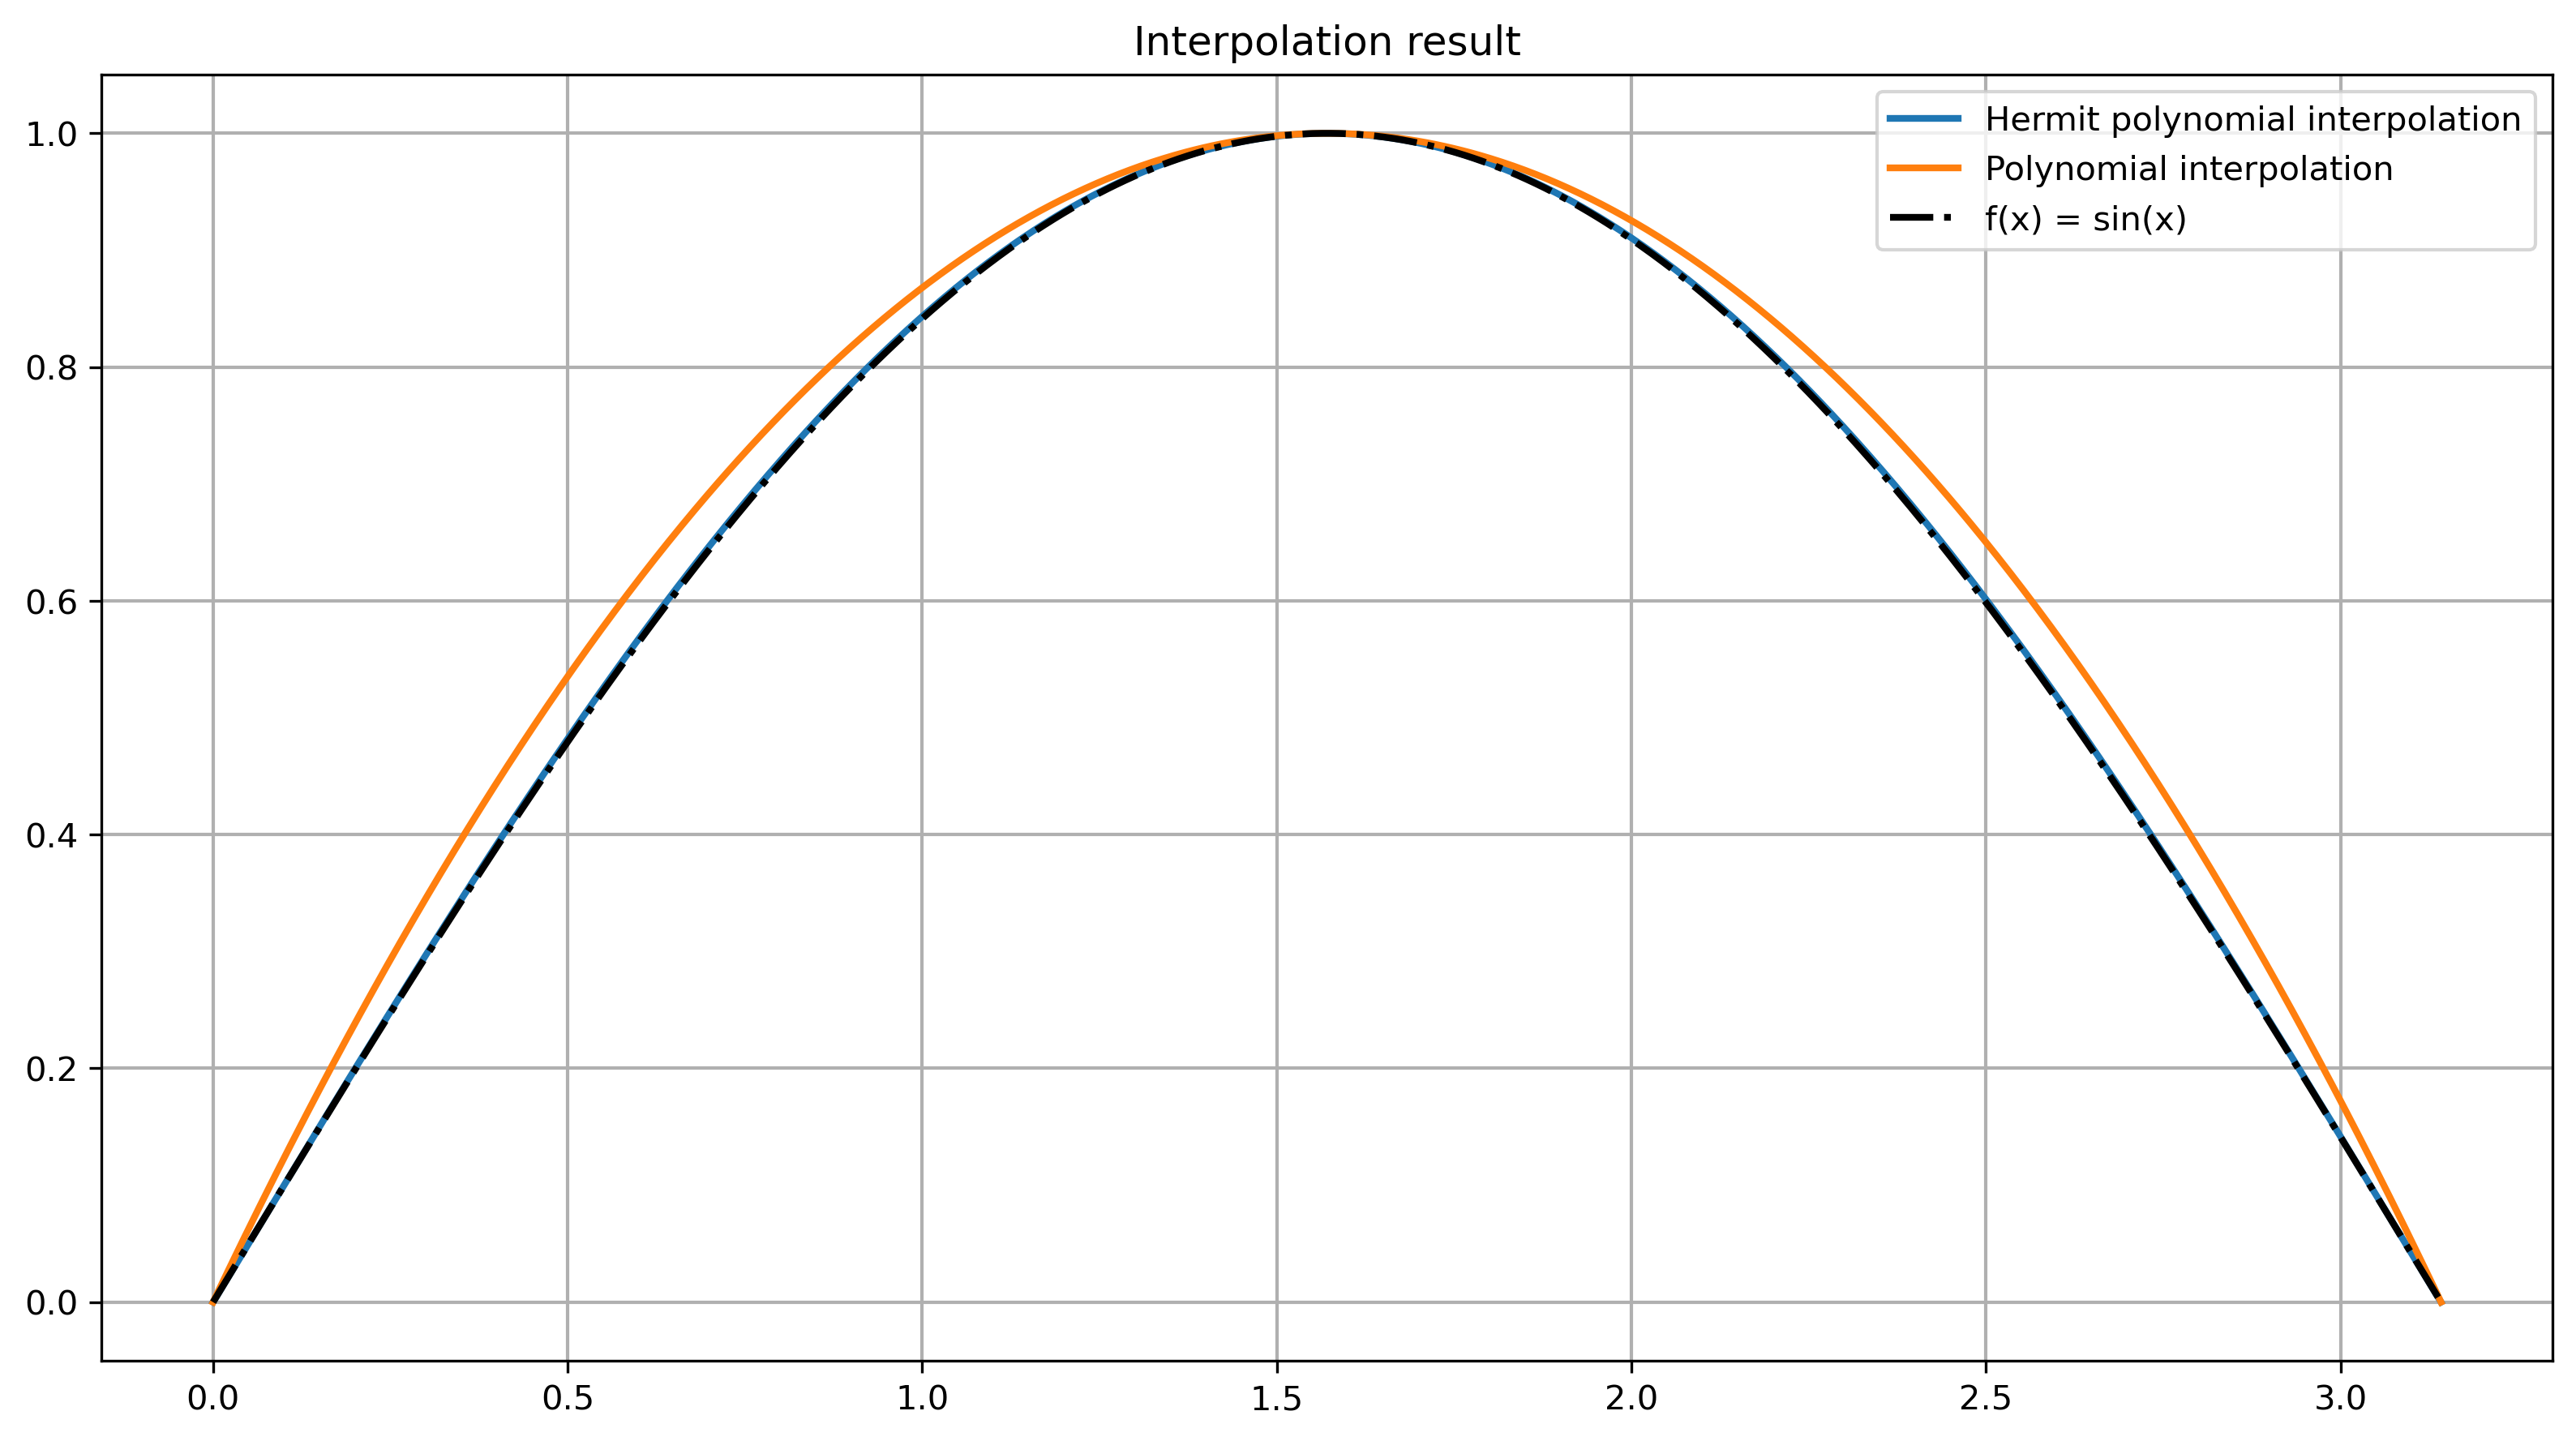

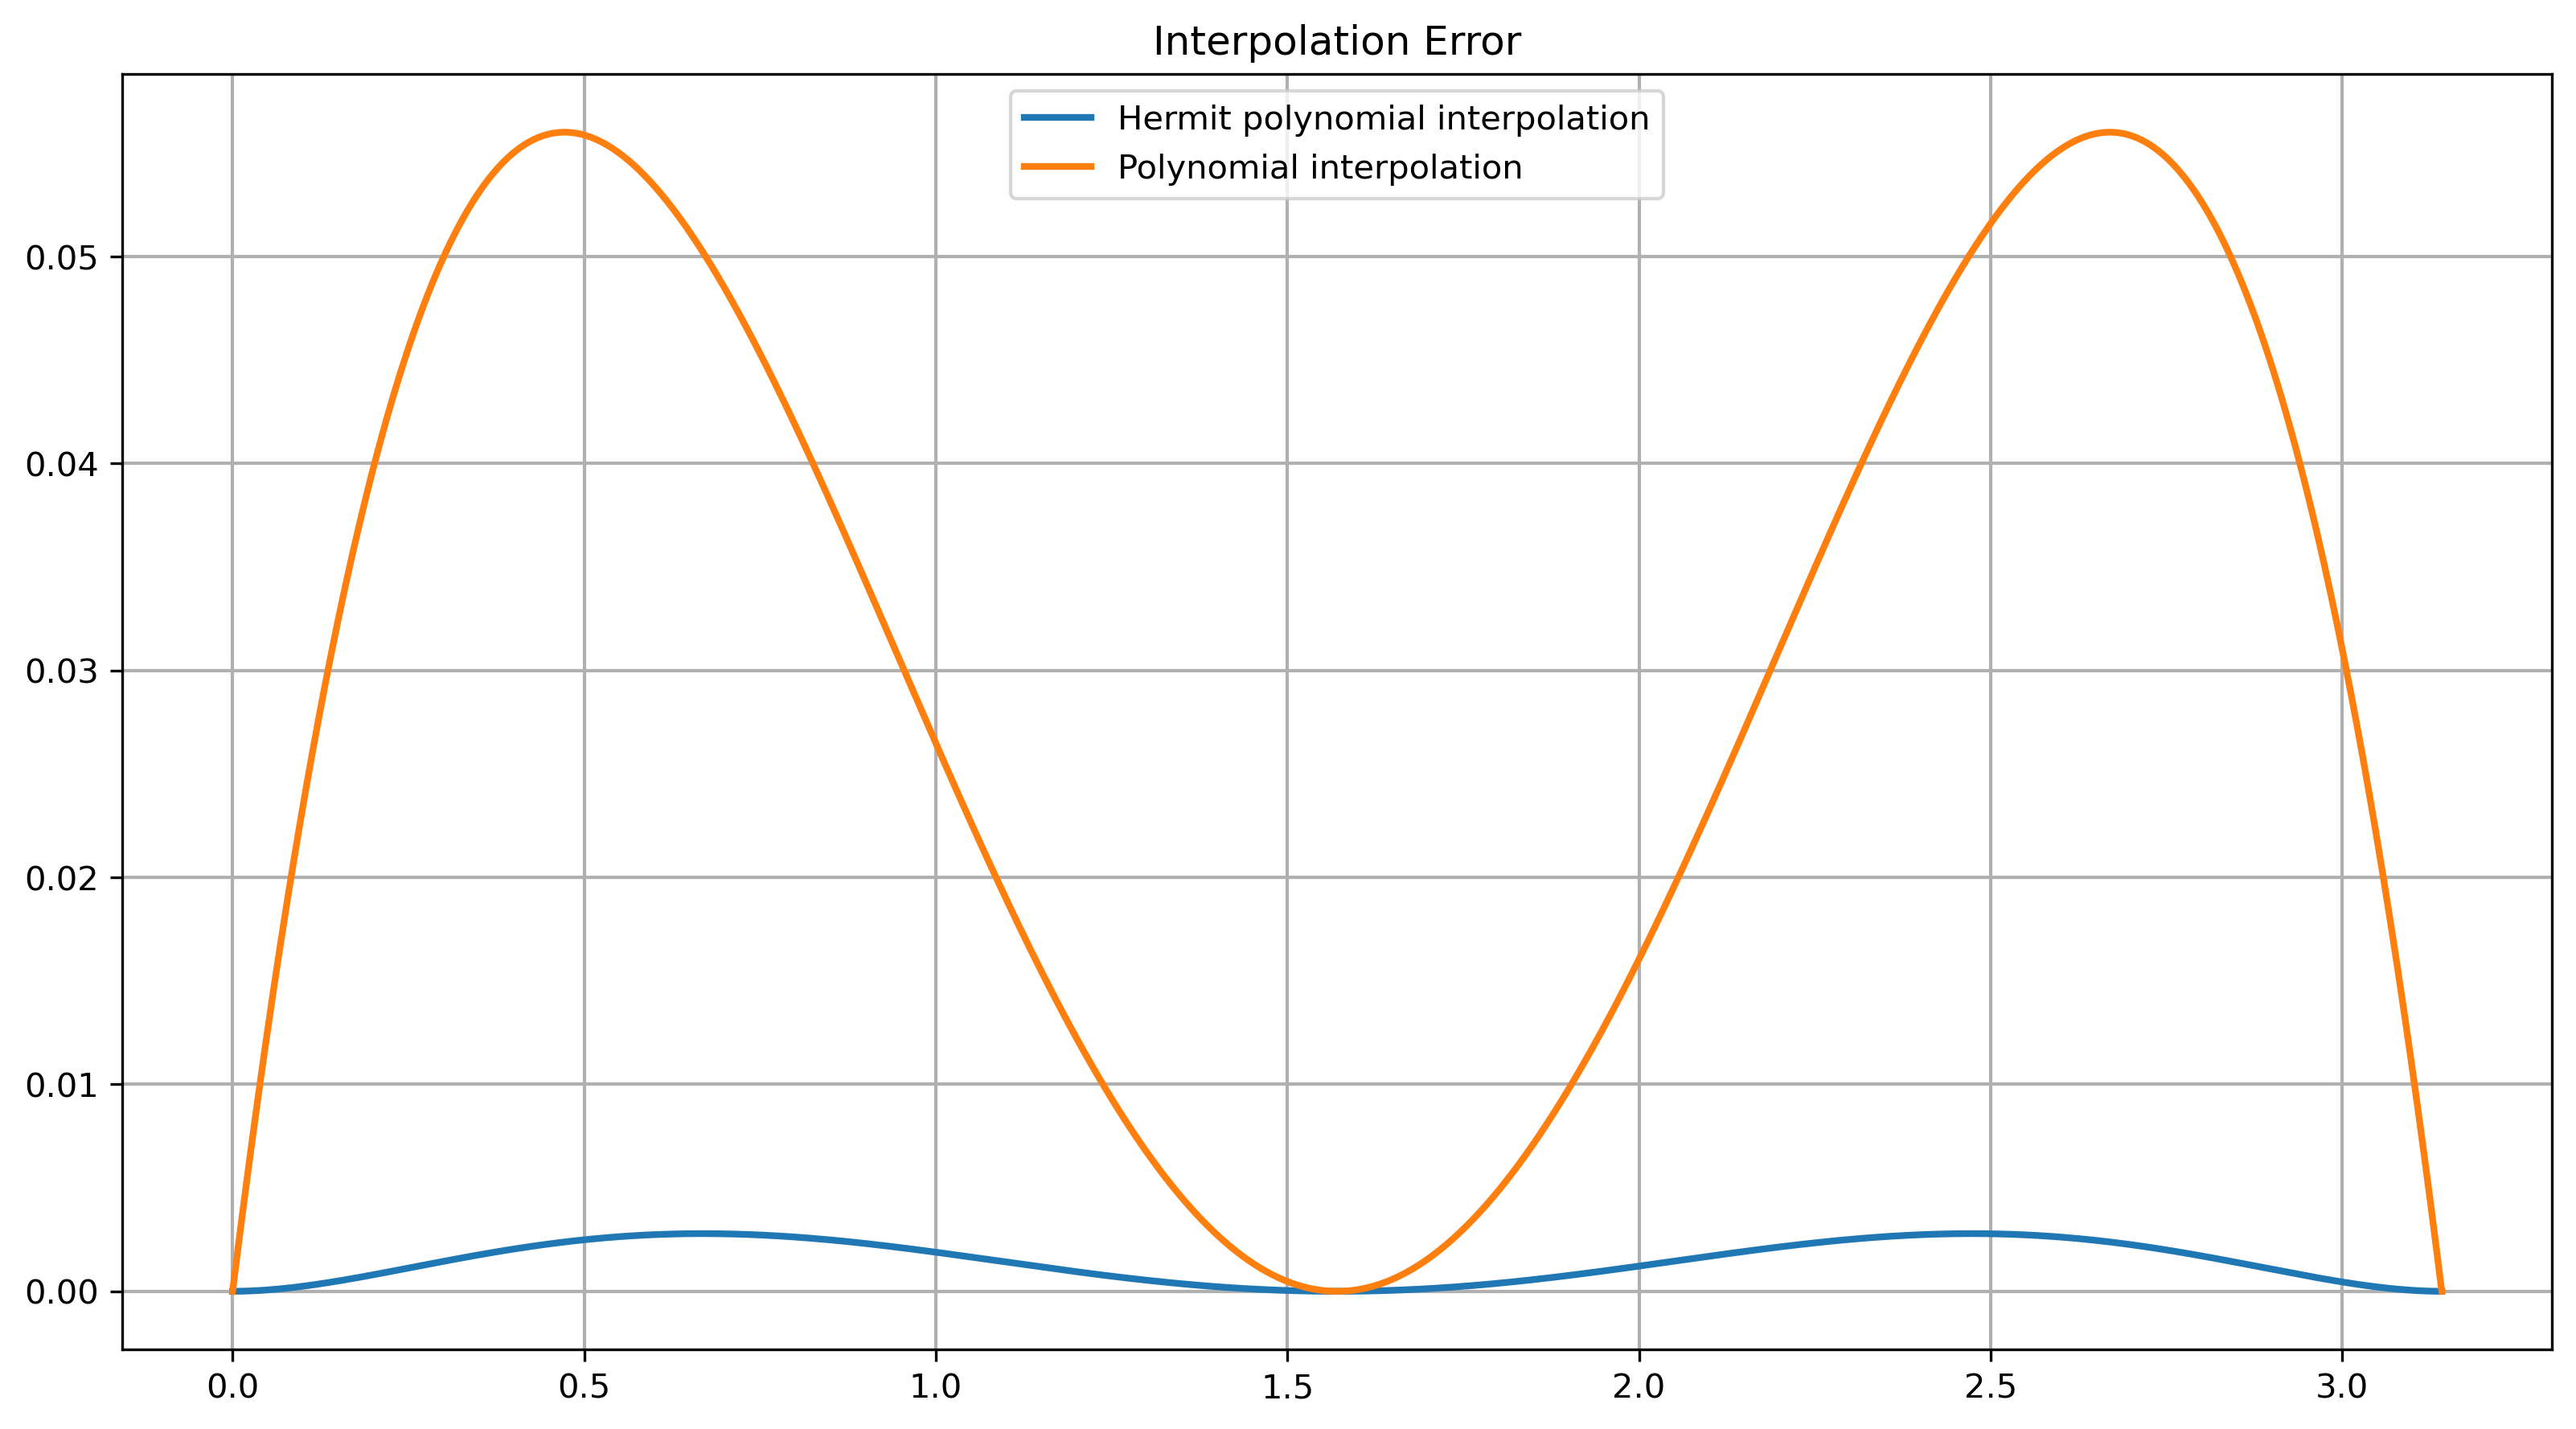

In [2]:
x_knots = np.array([0, np.pi/2, np.pi])
y_values = np.array([0, 1, 0], float)
derivaitves = np.array([1, 0, -1], float)

dd = NewtonInterpol(x_knots, y_values, derivaitves)
dd2 = NewtonInterpol(x_knots, y_values)

print(len(dd))

x_plot = np.linspace(0, np.pi, 1000)
y_plot = Horner(x_knots, dd, x_plot)
y_plot2 = Horner(x_knots, dd2, x_plot)

plt.figure(figsize = (13, 7))
plt.plot(x_plot, y_plot, label="Hermit polynomial interpolation")
plt.plot(x_plot, y_plot2, label='Polynomial interpolation')
plt.plot(x_plot, np.sin(x_plot), '-.k', label='f(x) = sin(x)')
plt.grid()
plt.legend()
plt.title("Interpolation result")

plt.figure(figsize = (13, 7))
plt.plot(x_plot, y_plot - np.sin(x_plot), label="Hermit polynomial interpolation")
plt.plot(x_plot, y_plot2 - np.sin(x_plot), label='Polynomial interpolation')
plt.grid()
plt.legend()
plt.title("Interpolation Error")

# Exercise 2.6

Compare the interpolation errors (convergence plots) of polynomial interpolation and spline interplation with classical cubic splines for the functions

- $f(x) = \sqrt{x}$ on $[0,1]$
- $f(x) = arctan(10x)$ on $[−1,1]$

You  can  start  from  the  notebook splines.ipynb using  the  interpolate  module  from scipy.  Try to find good knot distributions.

NameError: name 'max_error_poly_chevy' is not defined

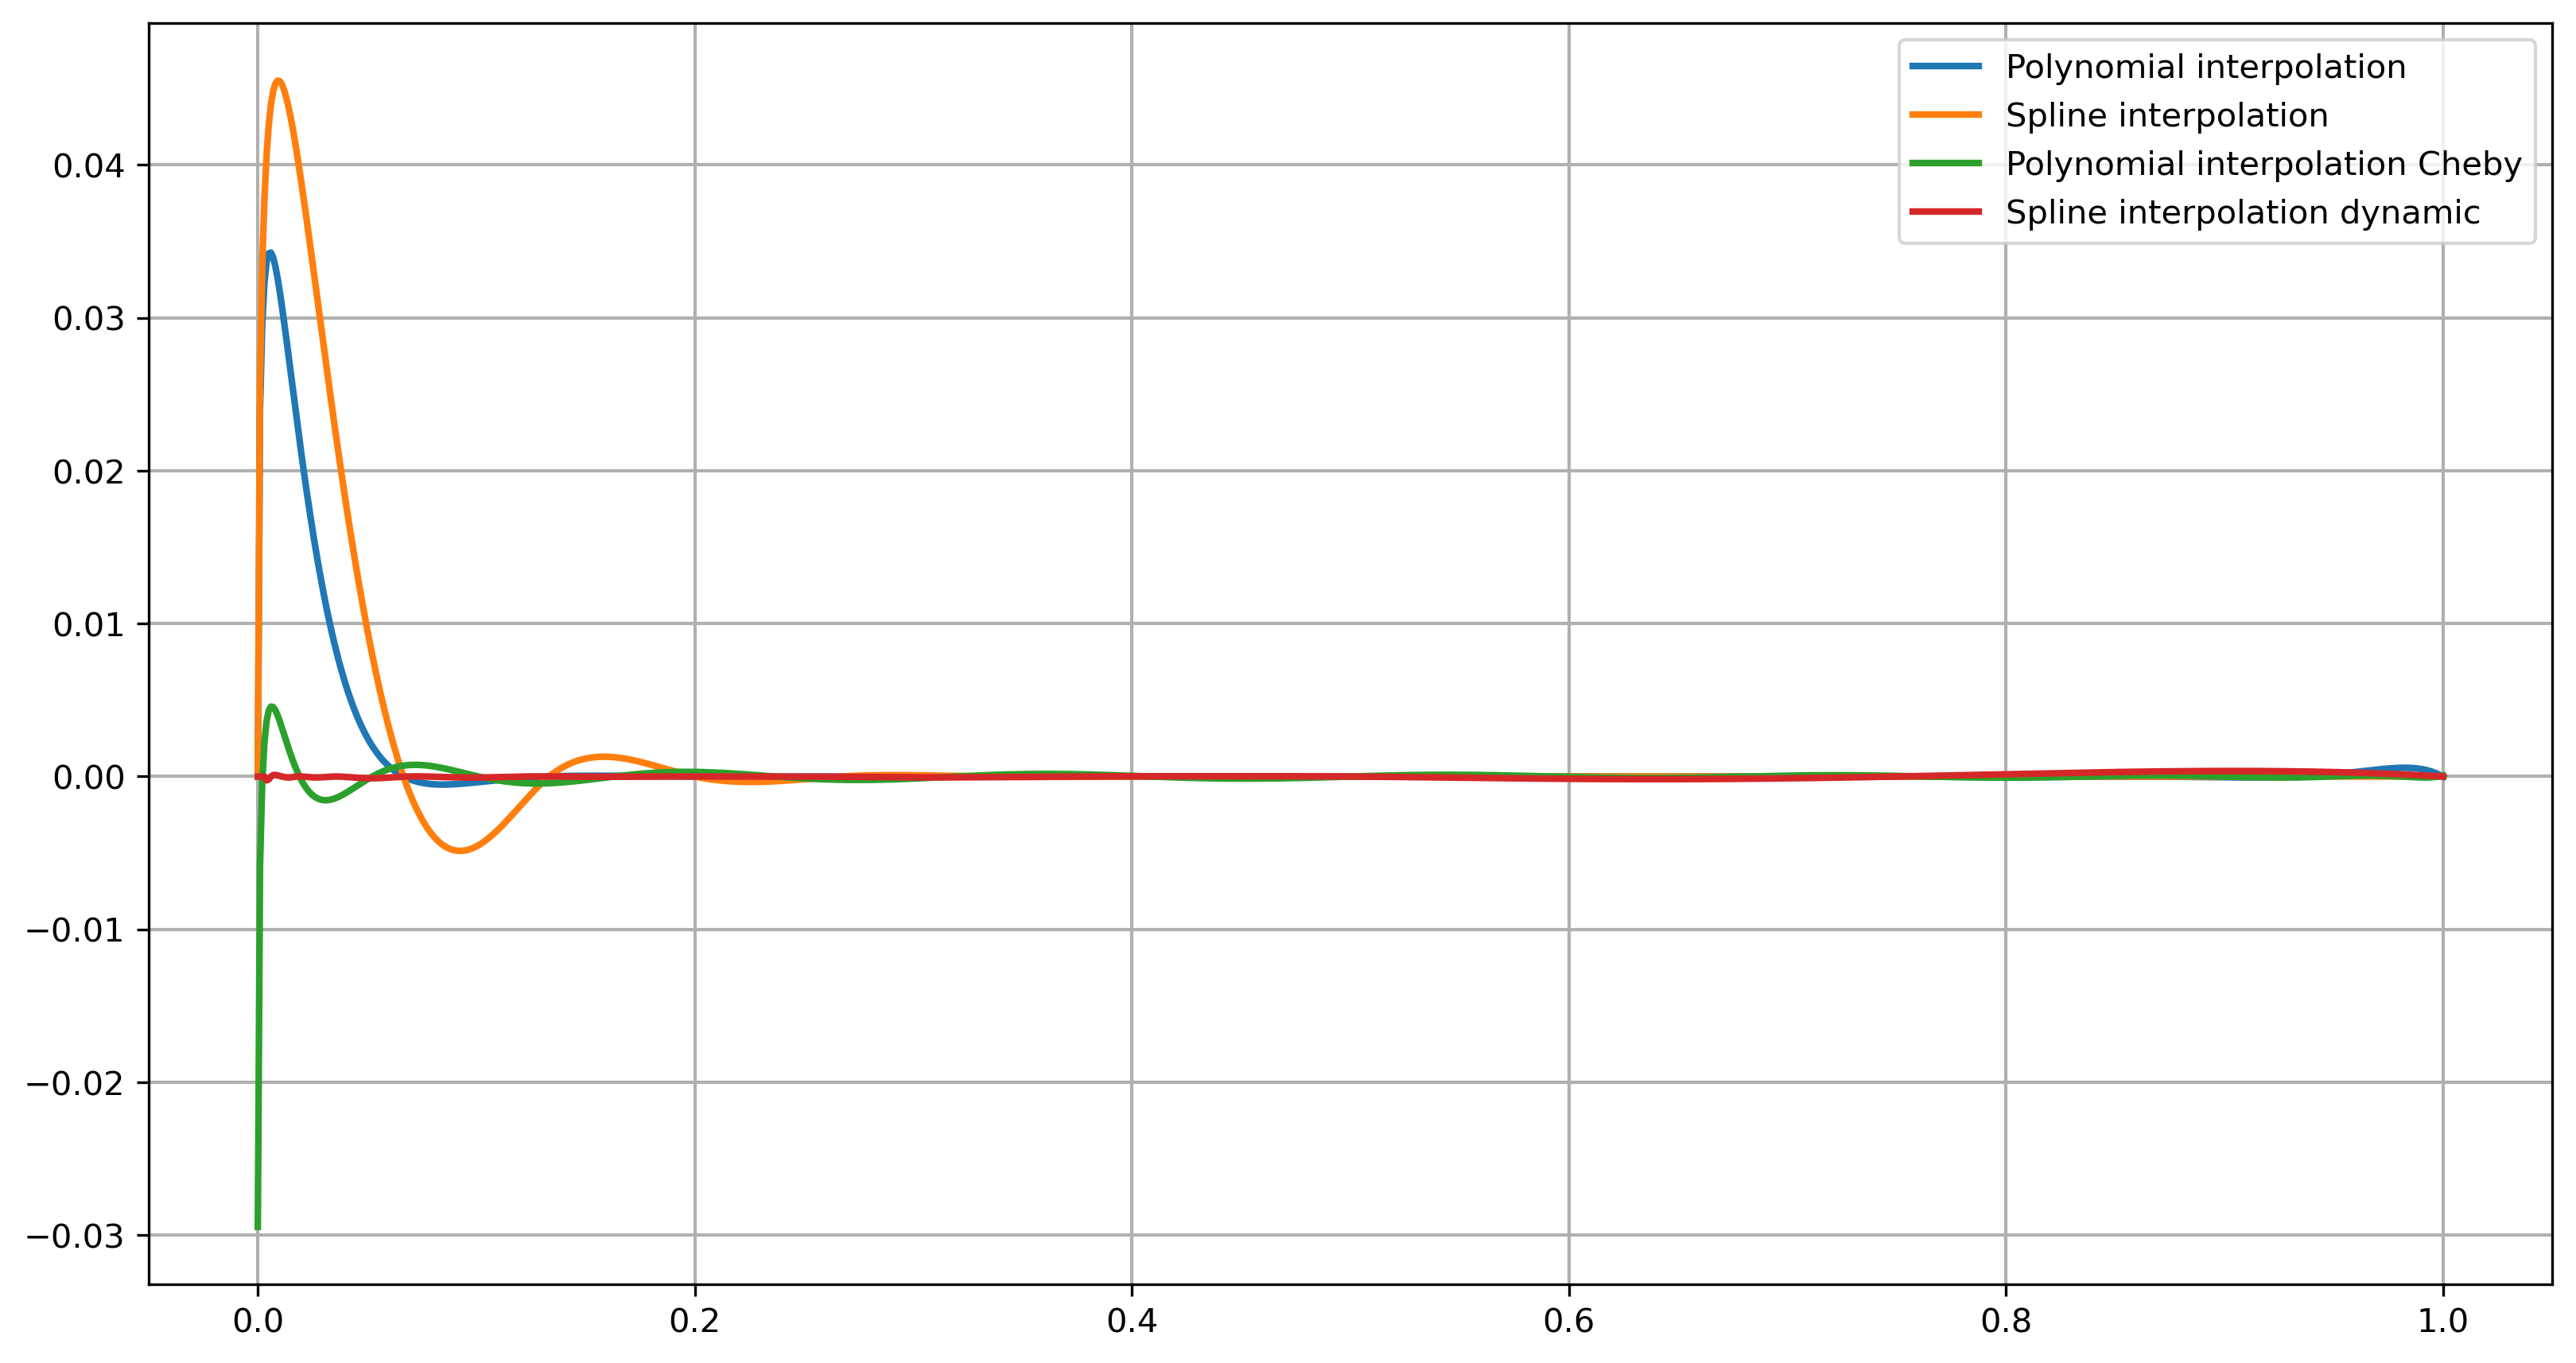

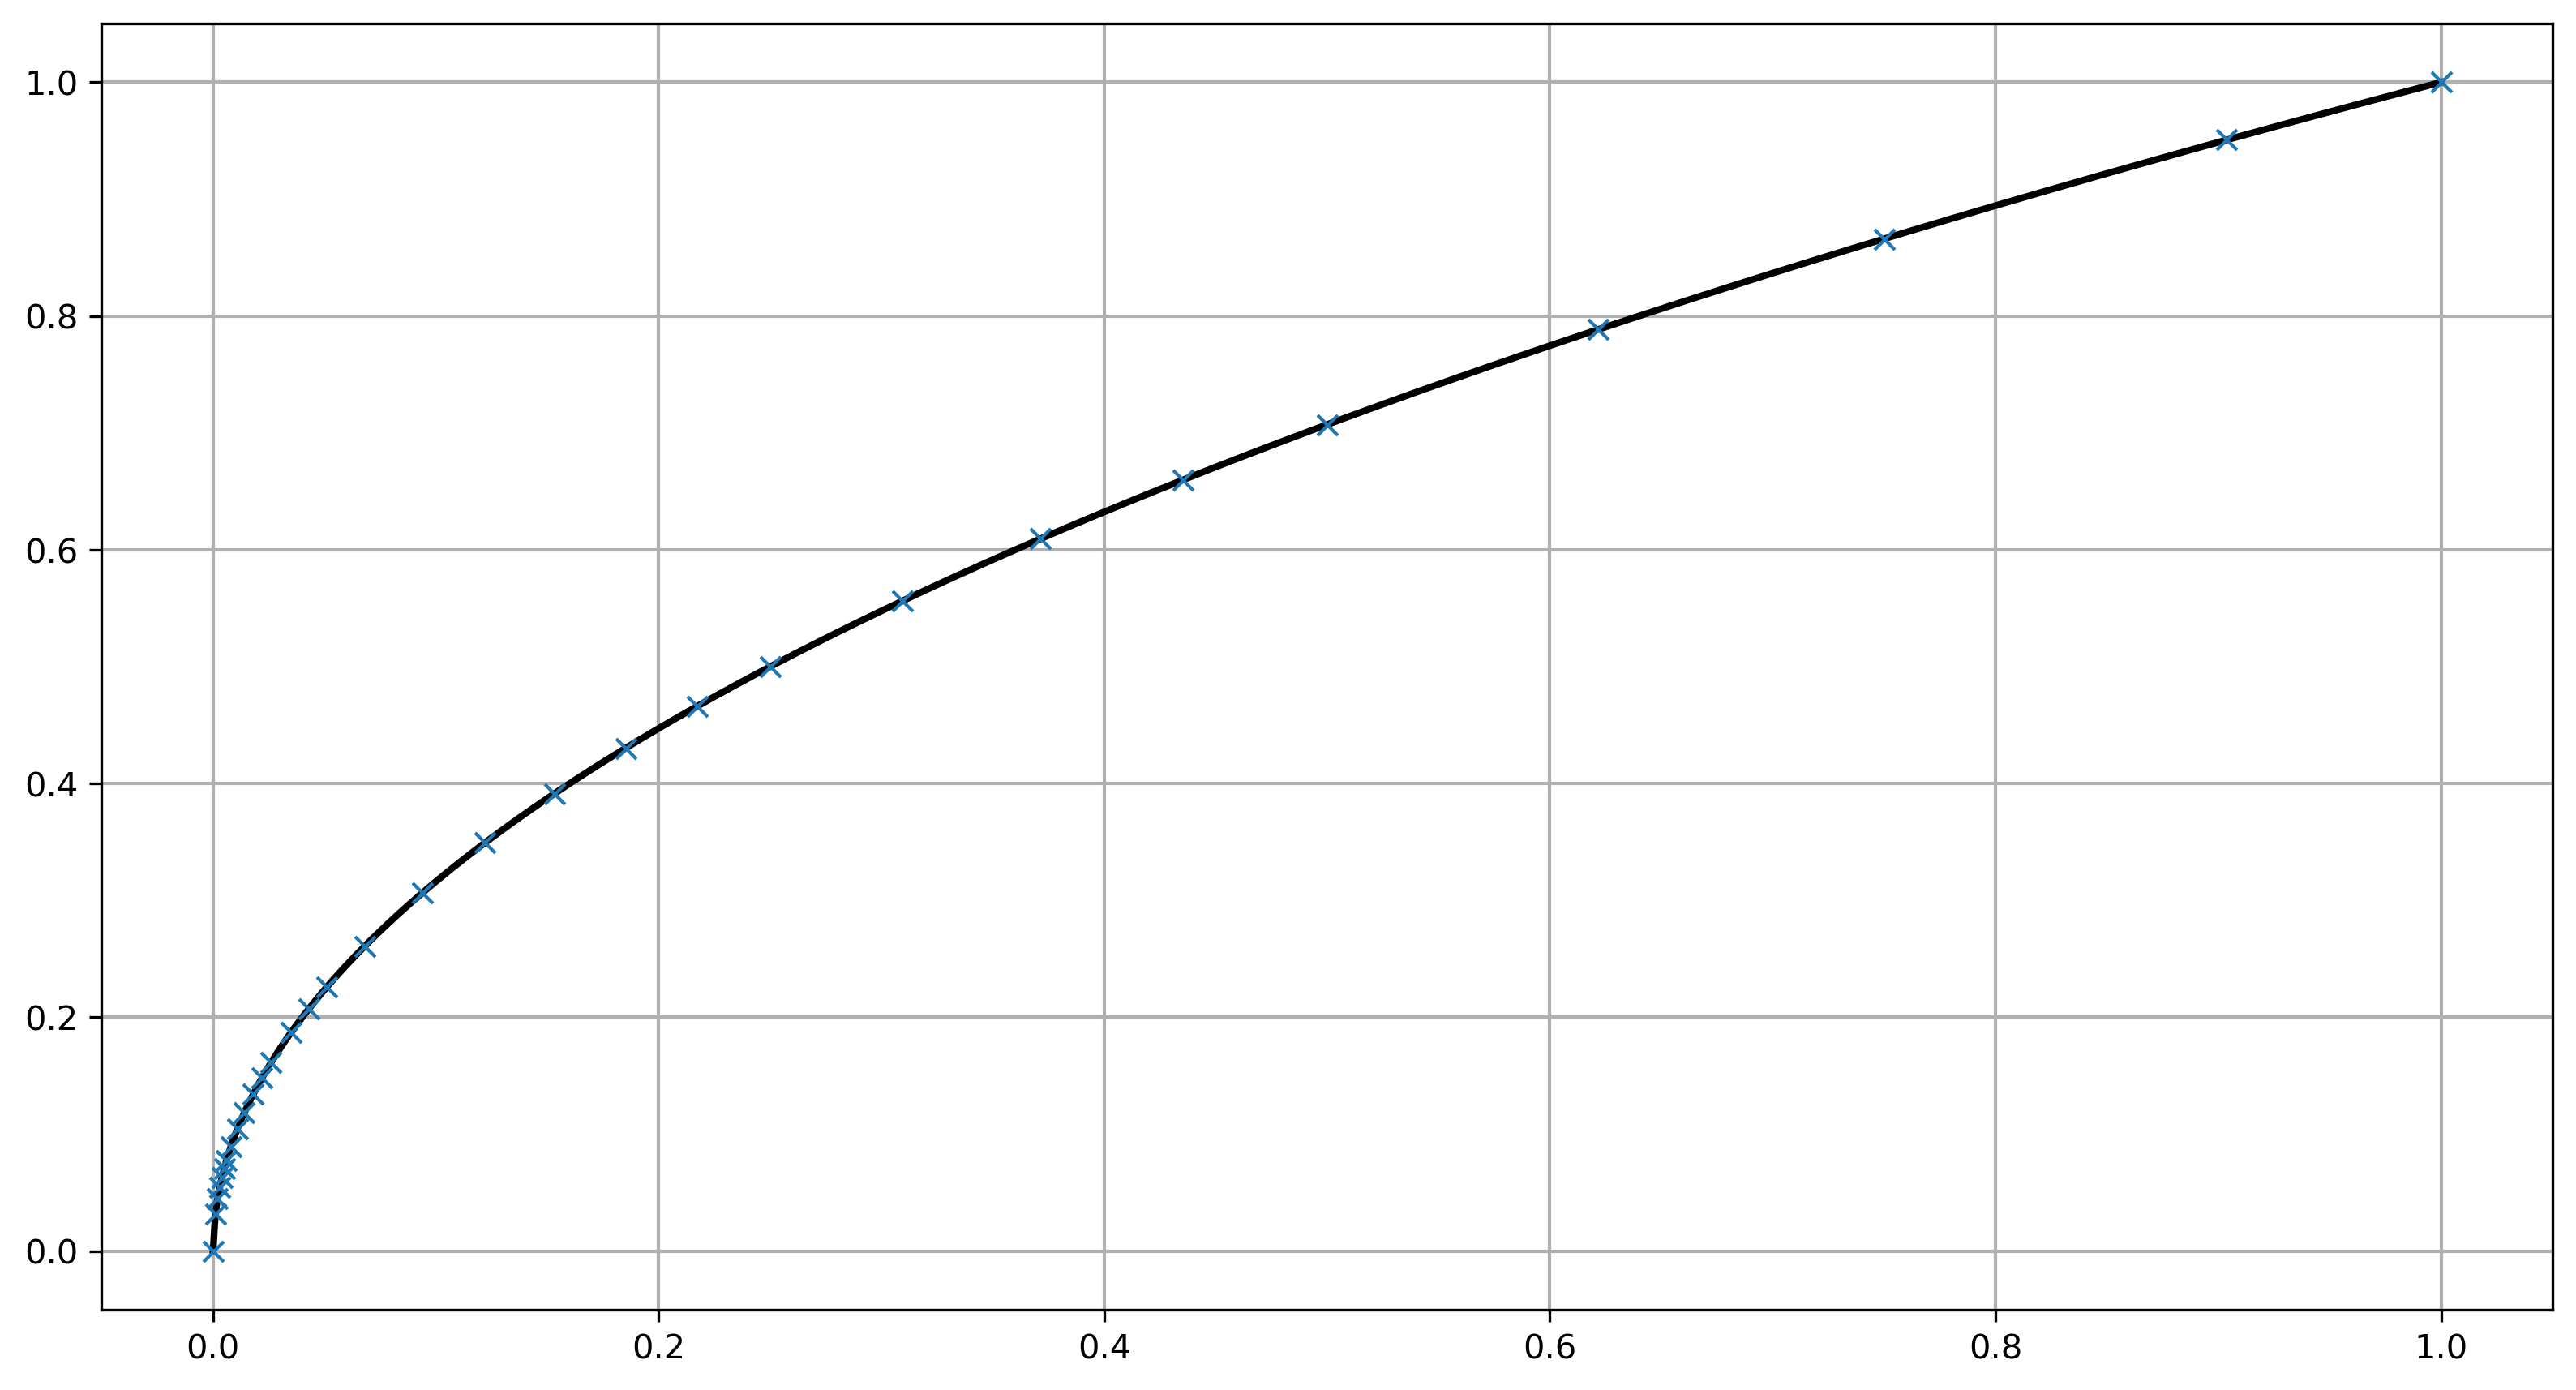

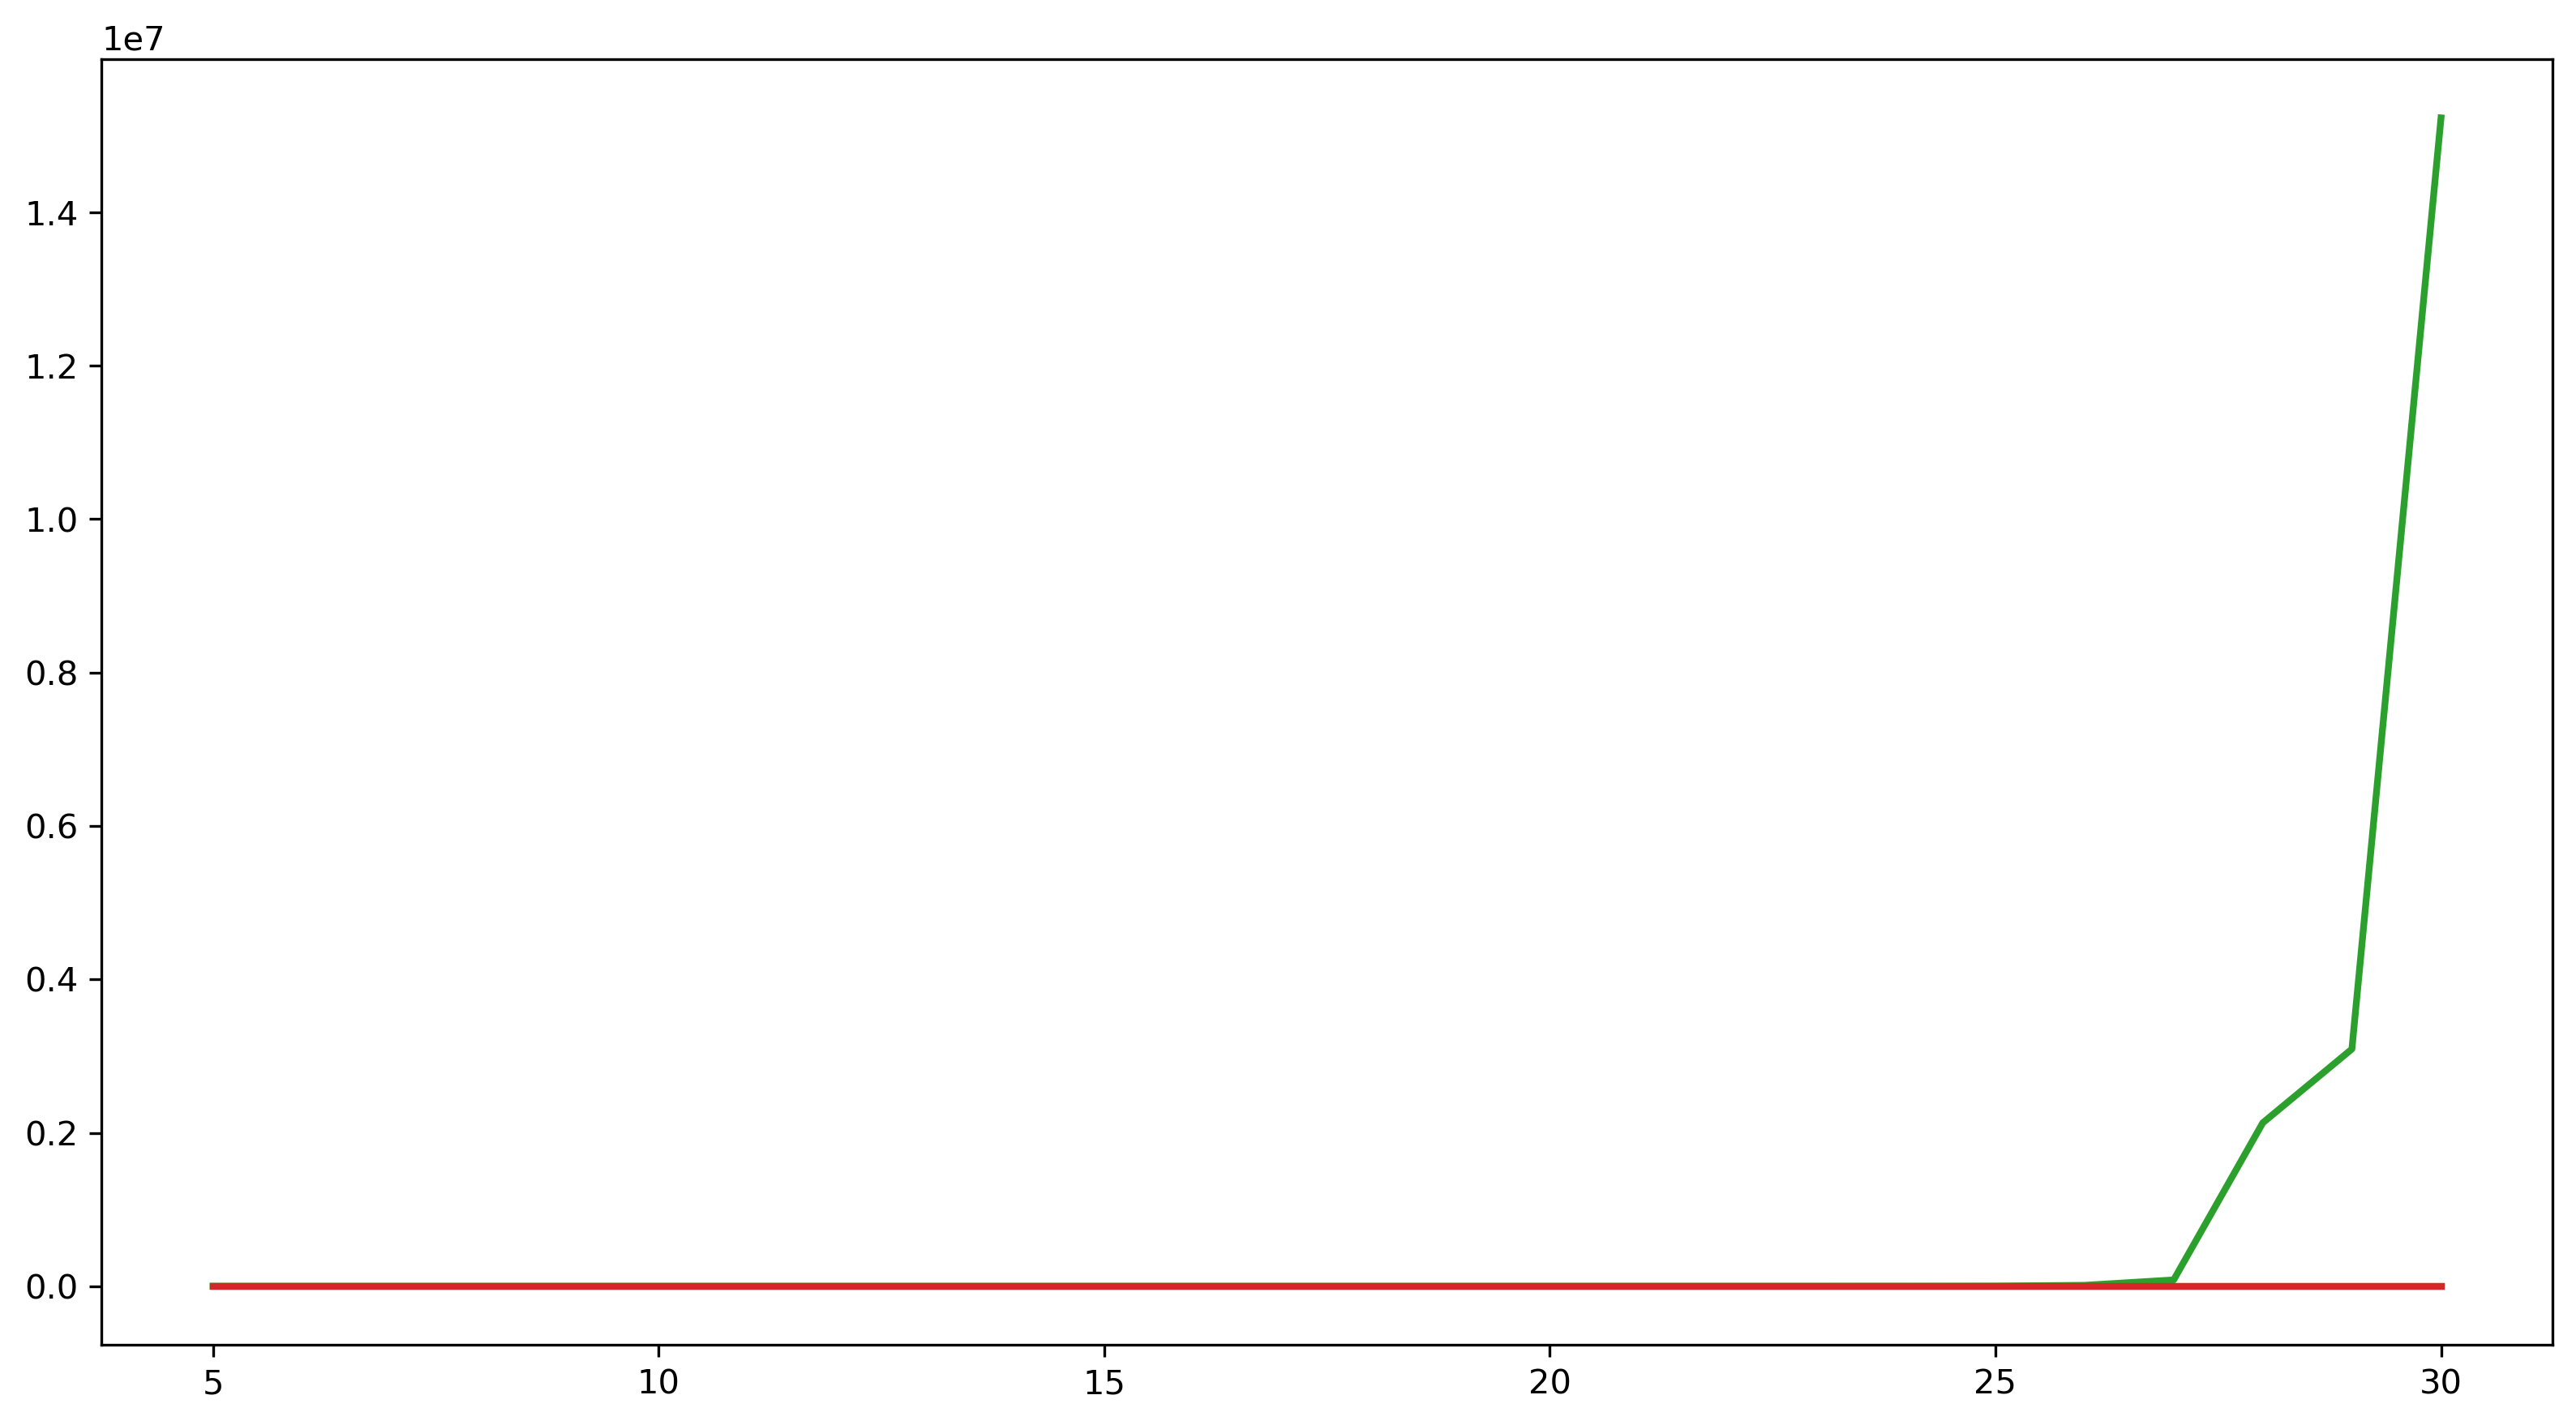

In [3]:
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['lines.linewidth'] = 2.0
mpl.rcParams['grid.linewidth'] = 1.0

n_max = 30
n_list = list(range(5, n_max+1))

max_error_spline = []
max_error_spline_dyn = []
max_error_poly = []
max_error_poly_cheby = []
max_error_poly_dyn = []

x = np.linspace(0,1,1000)
true_vals = np.sqrt(x)

dynamic_pts = np.array([0, 0.25, 0.5, 0.75, 1])

for n in n_list:
    linear_pts = np.linspace(0, 1, n, endpoint=True)
    linear_vals = np.sqrt(linear_pts)
    
    dynamic_pts_vals = np.sqrt(dynamic_pts)
    
    i = np.arange(n+1)
    cheby_pts = np.cos(np.pi * (2*i+1)/(2*n+2)) /2 +0.5
    cheby_vals = np.sqrt(cheby_pts)
    
    
    tck = interpolate.splrep(linear_pts, linear_vals)
    spline_inter = interpolate.splev(x, tck)
    
    max_error_spline.append(np.amax(np.abs(true_vals - spline_inter)))   
    
    
    tck = interpolate.splrep(dynamic_pts, dynamic_pts_vals)
    spline_dynamic_inter = interpolate.splev(x, tck)
    
    max_error_spline_dyn.append(np.amax(np.abs(true_vals - spline_dynamic_inter)))   
    
    # --- poly----
    poly = interpolate.lagrange(linear_pts, linear_vals)
    poly_inter = poly(x)
    
    max_error_poly.append(np.amax(np.abs(true_vals - poly_inter)))
    
    # poly cheby
    poly = interpolate.lagrange(cheby_pts, cheby_vals)
    poly_cheby_inter = poly(x)
    
    max_error_poly_cheby.append(np.amax(np.abs(true_vals - poly_cheby_inter)))
    
    
    poly = interpolate.lagrange(dynamic_pts, dynamic_pts_vals)
    poly_dyn_inter = poly(x)
    
    max_error_poly_dyn.append(np.amax(np.abs(true_vals - poly_dyn_inter)))
    
    max_error_idx = np.argmax(np.abs(true_vals - spline_dynamic_inter))
    dynamic_pts = np.append(dynamic_pts, x[max_error_idx])
    dynamic_pts = np.sort(dynamic_pts)
    
    if n == 16:
        plt.figure(figsize = (13, 7))
        plt.plot(x, true_vals - poly_inter, label="Polynomial interpolation")
        plt.plot(x, true_vals - spline_inter, label="Spline interpolation")
        plt.plot(x, true_vals - poly_cheby_inter, label="Polynomial interpolation Cheby")
        plt.plot(x, true_vals - spline_dynamic_inter, label="Spline interpolation dynamic")
        plt.grid()
        plt.legend()


plt.figure(figsize = (13, 7))
plt.plot(x, true_vals, 'k')
plt.plot(dynamic_pts, np.sqrt(dynamic_pts), 'x')
plt.grid()

        
plt.figure(figsize = (13, 7))
plt.plot(n_list, max_error_spline, 'C1', label="max Spline")
plt.plot(n_list, max_error_poly, 'C2', label="max Poly")
plt.plot(n_list, max_error_spline_dyn, 'C3', label="max Spline dyn")


plt.plot(n_list, max_error_poly_chevy, 'C4', label="Max poly Cheby")
plt.ylim([-0.1, 1])
plt.legend()
plt.grid()

In [ ]:
max_error_spline = []
max_error_poly = []
max_error_poly_cheby = []
max_error_spline_dyn = []
rmse_spline = []
rmse_poly = []
rmse_poly_cheby = []


def fun(x):
    return np.arctan(10*x)


x = np.linspace(-1,1,1000)
true_vals = fun(x)


dynamic_pts = np.linspace(-1, 1, 5, endpoint=True)

for n in n_list:
    linear_pts = np.linspace(-1, 1, n, endpoint=True)
    linear_vals = fun(linear_pts)
    
    i = np.arange(n+1)
    cheby_pts = np.cos(np.pi * (2*i+1)/(2*n+2))
    cheby_vals = fun(cheby_pts)
    
    dynamic_pts_vals = fun(dynamic_pts)
    
    tck = interpolate.splrep(linear_pts, linear_vals)
    spline_inter = interpolate.splev(x, tck)
    
    max_error_spline.append(np.amax(np.abs(true_vals - spline_inter)))
    rmse_spline.append(np.sqrt(np.sum((true_vals - spline_inter)**2)))
    
    tck = interpolate.splrep(dynamic_pts, dynamic_pts_vals)
    spline_dynamic_inter = interpolate.splev(x, tck)
    
    max_error_spline_dyn.append(np.amax(np.abs(true_vals - spline_dynamic_inter)))   
    # --- poly----
    poly = interpolate.lagrange(linear_pts, linear_vals)
    poly_inter = poly(x)
    
    max_error_poly.append(np.amax(np.abs(true_vals - poly_inter)))
    rmse_poly.append(np.sqrt(np.sum((true_vals - poly_inter)**2)))
    
    # poly cheby
    poly = interpolate.lagrange(cheby_pts, cheby_vals)
    poly_inter = poly(x)
    
    max_error_poly_cheby.append(np.amax(np.abs(true_vals - poly_inter)))
    rmse_poly_cheby.append(np.sqrt(np.sum((true_vals - poly_inter)**2)))
    
    max_error_idx = np.argmax(np.abs(true_vals - spline_dynamic_inter))
    dynamic_pts = np.append(dynamic_pts, x[max_error_idx])
    dynamic_pts = np.sort(dynamic_pts)
    
    if n == 16:
        plt.figure(figsize = (13, 7))
        plt.plot(x, true_vals - poly_inter, label="Polynomial interpolation")
        plt.plot(x, true_vals - spline_inter, label="Spline interpolation")
        plt.plot(x, true_vals - spline_dynamic_inter, label="Spline interpolation dynamic")
        # plt.plot(x, true_vals - poly_cheby_inter, label="Polynomial interpolation Cheby")
        plt.grid()
        plt.legend()
        
        
plt.figure(figsize = (13, 7))
plt.plot(x, true_vals, 'k')
plt.plot(dynamic_pts, fun(dynamic_pts), 'x')
plt.grid()

    
plt.figure(figsize = (13, 7))
plt.plot(n_list, max_error_spline, 'C1', label="max Spline")
# plt.plot(n_list, rmse_spline, '--C1', label="RMSE Spline")
plt.plot(n_list, max_error_poly, 'C2', label="max Poly")

# plt.plot(n_list, rmse_poly, '--C2', label="RMSE Poly")
#plt.plot(n_list, max_error_poly_chevy, 'C3', label="Max poly Cheby")
plt.plot(n_list, max_error_spline_dyn, 'C4', label="Max spline dyn")
# plt.plot(n_list, rmse_poly_cheby, '--C3', label="RMSE Poly Cheby")
plt.ylim([-0.1, 1])
plt.legend()
plt.grid()

# Exercise 2.7

Find a good approximation to $$\sum_{j=1}^\infty \frac{6}{j^2} = \pi^2$$ by extrapolation.  

Hint: Define the function 

$$f:\{1/n:n∈N\} → R : x → \sum_{j=1}^{1/x}\frac{6}{j^2}, $$

apply polynomial interpolation with knots $x_i= 2^{−i}$, and evaluate the interpolationpolynomial at $x=0$.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['lines.linewidth'] = 2.0
mpl.rcParams['grid.linewidth'] = 1.0

approximation_list = []
n_max_list = range(4, 30)


def aitken_neville(x_nodes, y_nodes, x):
    p = y_nodes
    n = len(x_nodes)-1

    for m in range(n):
        for i in range(n-m):
            j = i+1+m
            p[i] = ((x-x_nodes[j]) * p[i] - (x-x_nodes[i]) * p[i+1]) / (x_nodes[i] - x_nodes[j])

    return p[0]


def reihen_glied(n):
    j = np.arange(n)+1
    return np.sum(6/j**2)


for n_max in n_max_list:
    i = np.arange(n_max)
    x_list = 2.**-i
    n_list = 2.**i

    y_list = [reihen_glied(current_n) for current_n in n_list]

    approximation_list.append(aitken_neville(x_list, y_list, 0))
    

approximation_list = np.array(approximation_list)
plt.figure(figsize = (13, 7))
plt.plot(n_max_list, np.abs(approximation_list - np.pi**2))
plt.yscale("log")
plt.grid()
plt.xlabel("Number of knots")
plt.ylabel("Absolute error")
plt.title("Error of approximation")